# Volatility and Risk


Volatility often refers to the amount of uncertainty or risk related to the size of changes in a security's value. A higher volatility means that a security's value can potentially be spread out over a larger range of values. This means that the price of the security can change dramatically over a short time period in either direction. A lower volatility means that a security's value does not fluctuate dramatically, and tends to be more steady.

One way to measure an asset's variation is to quantify the daily returns (percent move on a daily basis) of the asset. Historical volatility is based on historical prices and represents the degree of variability in the returns of an asset. This number is without a unit and is expressed as a percentage. While variance captures the dispersion of returns around the mean of an asset in general, volatility is a measure of that variance bounded by a specific period of time. Thus, we can report daily volatility, weekly, monthly, or annualized volatility. It is therefore useful to think of volatility as the annualized standard deviation: Volatility = (variance annualized)^0.5

In the securities markets, volatility is often associated with big swings in either direction. For example, when the stock market rises and falls more than one percent over a sustained period of time, it is called a "volatile" market. An asset's volatility is a key factor when pricing options contracts.

We've seen that the volatility is measured by the average squared deviation from the mean, which is the standard deviation.
Let's read the sample returns that we've been working with.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

prices = pd.read_csv("sample_prices.csv")
returns = prices.pct_change()
returns

,GM,Ford
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


Notice that the first set of returns are NaN, which is Pandas way of saying that it's an NA. We can drop that row using the `.dropna()` method.

In [2]:
returns = returns.dropna()
returns

,GM,Ford
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


Let's compute the standard deviation from first principals:

In [3]:
deviations              = returns - returns.mean()
squared_deviations      = deviations**2
mean_squared_deviations = squared_deviations.mean()
volatility              = mean_squared_deviations**0.5

# or we can do it the other way by omporing .sqrt() from numpy

import numpy as np

volatility = np.sqrt(mean_squared_deviations)
volatility

GM      0.022957
Ford    0.076212
dtype: float64

Let's see if we get the same answer when we use the built-in `.std()` method.

In [4]:
returns.std()

GM      0.023977
Ford    0.079601
dtype: float64

Why don't they match? Because, by default, the `.std()` method computes the _sample standard deviation_ which means that it uses the denominator of $n-1$. On the other hand, we computed the _population_ standard deviation, which uses a numerator of $n$. Since the observed returns are thought of as observed samples from a distribution, it is probably more accurate to use the denominator of $n-1$, so let's redo our calculation to see if we get the same number.

To get the number of observations, we can use the `.shape` attribute of a DataFrame that returns a tuple of the number of rows and columns.

In [5]:
returns.shape

(12, 2)

Just as we can with a list, we can access the elements of a tuple using an index, starting at 0. Therefore, to get the number of rows in the DataFrame, we extract the 0th element of the tuple.

In [6]:
number_of_obs           = returns.shape[0]
number_of_obs

12

In [7]:
squared_deviations.sum()

GM      0.006324
Ford    0.069700
dtype: float64

In [8]:
number_of_obs           = returns.shape[0]
mean_squared_deviations = squared_deviations.sum()/(number_of_obs-1)
volatility              = np.sqrt(mean_squared_deviations)
volatility

GM      0.023977
Ford    0.079601
dtype: float64

In [9]:
returns.std()

GM      0.023977
Ford    0.079601
dtype: float64

As you can see now both methods match 

# Annualizing Volatility

We annualize volatility by scaling (multiplying) it by the square root of the number of periods per observation

Therefore, to annualize the volatility of a monthly series, we muiltiply it by the square root of 12. Instead of using the `np.sqrt()` we can raise it to the power of $0.5$

In [10]:
annualized_vol = returns.std()*(12**0.5)
annualized_vol

GM      0.083060
Ford    0.275747
dtype: float64

In [11]:
annualized_vol = returns.std()*np.sqrt(12)
annualized_vol

GM      0.083060
Ford    0.275747
dtype: float64

# Risk Adjusted Returns

Let's get beyond the sample data series and start working with some real data. Read in the monthly returns of a set of 19 stocks of different companies. We only want to look at Stock_02 and Stock_08 to  do so we will implement the code below. 

In [12]:
portfolio = pd.read_csv("Portfolios_Formed_on_ME_monthly_EW.csv",
                   header=0, index_col=0, parse_dates=True, na_values=-99.99)
portfolio.head()

,Stock_01,Stock_02,Stock_03,Stock_04,Stock_05,Stock_06,Stock_07,Stock_08,Stock_09,Stock_10,Stock_11,Stock_12,Stock_13,Stock_14,Stock_15,Stock_16,Stock_17,Stock_18,Stock_19
YYYYMM,,,,,,,,,,,,,,,,,,,
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [13]:
cols    = ['Stock_02', 'Stock_08']
returns = portfolio[cols]
returns.head()

,Stock_02,Stock_08
YYYYMM,,
192607,-0.43,1.47
192608,3.90,1.61
192609,-1.08,-0.50
192610,-3.32,-3.36
192611,-0.46,3.39


Note that the data is already given in percentages (i.e 4.5 instead of 0.045) and we typically want to use the actual numbers (i.e. 0.045 instead of 4.5) so we should divide the raw data from the file by 100.

In [14]:
returns = returns/100

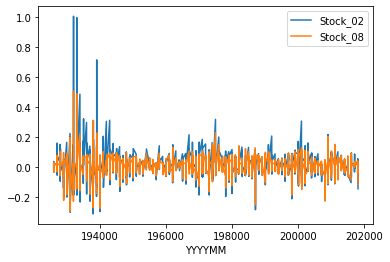

In [15]:
returns.plot()

We can rename 'Stock_02' & 'Stock_08 to 'SmallCap' & 'LargeCap'

In [16]:
returns.columns = ['SmallCap', 'LargeCap']

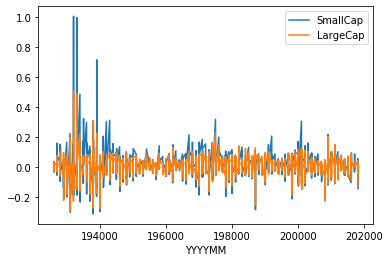

In [17]:
returns.plot()

In [18]:
annualized_vol = returns.std()*np.sqrt(12)
annualized_vol

SmallCap    0.315962
LargeCap    0.221486
dtype: float64

We can now compute the annualized returns as follows:

First let convert the daily return to monthly return

In [25]:
n_months = returns.shape[0]
n_months

1110

In [26]:
n_months = returns.shape[0]
return_per_month = (returns+1).prod()**(1/n_months) - 1
return_per_month

SmallCap    0.011289
LargeCap    0.008696
dtype: float64

In [20]:
annualized_return = (return_per_month + 1)**12-1

In [21]:
annualized_return = (returns+1).prod()**(12/n_months) - 1
annualized_return

SmallCap    0.144204
LargeCap    0.109488
dtype: float64

In [22]:
annualized_return/annualized_vol

SmallCap    0.456399
LargeCap    0.494332
dtype: float64

Sharpe ratio is the excess return divided by the annualized_vol

In [23]:
riskfree_rate = 0.03
excess_return = annualized_return - riskfree_rate
sharpe_ratio = excess_return/annualized_vol
sharpe_ratio

SmallCap    0.361450
LargeCap    0.358883
dtype: float64

If you look at the Sharpe ratio, it appears that small caps did in fact give you a slightly superior risk adjusted return over large cap stocks.Therefore the SmallCap Stock is better than the LargeCap stock     